Шаг № 1 блока «5.1 Введение в нейронные сети»
Обучите нейронную сеть на датасете mnist. Добейтесь точности предсказания выше 97.5% на валидационном датасете

(10 баллов)

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

Загрузим данные из датасета mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Определим размерность выборок

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Произведем предобработку тренировочных и тестовых данных

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))  # Входные изображения в наборе данных MNIST представлены в виде массивов из 28х28 пикселей. Этот код преобразует каждый массив в трехмерный массив размера 28х28х1 для работы в нейронной сети. Поскольку мы имеем чёрно-белое изображение (1-ый канал), то мы добавляем 1 в конце.

x_train = x_train / 255.  # Нормализуем значения пикселей изображения в диапазоне от 0 до 1.

y_train = to_categorical(y_train)  #В нейронной сети используется one-hot encoding для меток классов. Это означает, что каждая метка класса будет представлена в виде вектора, длиной равной количеству классов, где все значения равны 0 за исключением одного, который равен 1.

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.
y_test = to_categorical(y_test)

Создадим модель нейронной сети при помощи библиотеки Keras с несколькими слоями.

Первый слой этой модели - Conv2D - это сверточный слой, который выполняет операцию свертки на изображении. Он используется для извлечения признаков из изображения. Conv2D принимает несколько аргументов:

- Количество фильтров (32). Каждый фильтр извлекает различные признаки из изображения.
- Размер ядра (3, 3). Ядро - это матрица, которая "скользит" по изображению и применяет операцию свертки. Размер ядра определяет, какие признаки будут извлечены из изображения.
- Функция активации (relu). Функции активации используются для добавления нелинейности в модель. Rectified Linear Unit (ReLU) - это одна из наиболее популярных функций активации, которая широко используется в сверточных нейронных сетях.

Второй слой - MaxPooling2D - выполняет операцию объединения (pooling) на признаках, извлеченных из изображения. Он используется для уменьшения размерности признаков, ускорения вычислений и предотвращения переобучения. MaxPooling2D принимает аргумент pool_size, который определяет размер объединяемой области.

Третий слой - Flatten - преобразует выходные данные, полученные из предыдущего слоя, в плоский массив. Эта операция не извлекает признаки, а просто преобразует матрицу в вектор

Четвертый слой является полносвязным (dense) с 10 выходами и активационной функцией softmax.
Softmax - это функция активации, которая часто используется в выходном слое нейросетей для многоклассовой классификации. Функция принимает вектор значений и вычисляет вероятности принадлежности каждого значения к одному из классов. Применение функции softmax преобразует вектор выхода последнего слоя нейросети в вектор вероятностей для каждого класса.

В итоге получается 4 слоя:

1. Сверточный слой (Convolutional Layer)
2. Слой подвыборки (Max Pooling Layer)
3. Слой выравнивания (Flatten Layer)
4. Полносвязный слой (Dense Layer)

In [5]:
# Создание модели
model = Sequential()

# Первый слой (добавляется сверточный слой с 32 фильтрами размера 3x3 и активационной функцией ReLU)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Второй слой (слой подвыборки (pooling) с размером окна 2x2)
model.add(MaxPooling2D((2, 2)))

# Третий слой (слой выравнивания (flatten), который преобразует выходные данные предыдущего слоя в одномерный массив)
model.add(Flatten())

# Четвертый слой (полносвязный слой (dense) со 10 выходами и активационной функцией softmax)
model.add(Dense(10, activation='softmax'))

Компиляция и обучение созданной модели нейронной сети:
Компилируем созданную модель, используя оптимизатор 'adam', функцию потерь 'categorical_crossentropy' (потери в многоклассовой классификации), и метрику 'accuracy' (точность классификации).
Затем обучим на наборе данных обучения `x_train` и `y_train` в течение 5 эпох (одна эпоха - один проход через все данные), с размером пакета (`batch_size`) 32. Используем параметр `validation_data` для передачи в функцию тестового набора данных. Это позволит оценить производительность модели в процессе обучения на отдельном наборе данных, который не участвует в процессе обучения.

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2328 - accuracy: 0.9341 - val_loss: 0.0958 - val_accuracy: 0.9718
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0859 - accuracy: 0.9751 - val_loss: 0.0724 - val_accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0555 - val_accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0598 - val_accuracy: 0.9798


Оценка производительности модели на тестовых данных

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {round((test_loss* 100), 1)}%\nTest accuracy: {round((test_acc * 100), 1)}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9798
Test loss: 6.0%
Test accuracy: 98.0%


Визуализация результатов классификации

313/313 [==============================] - 1s 4ms/step


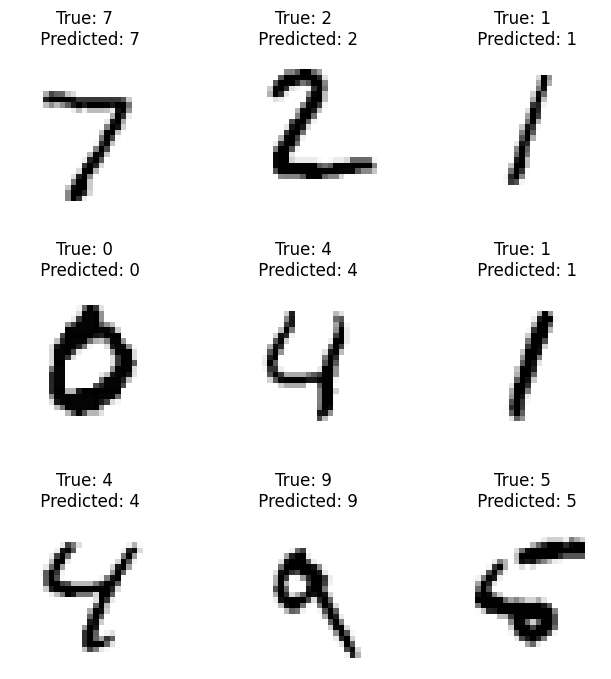

In [8]:
# Получение предсказаний классов на тестовых данных
y_pred = model.predict(x_test)

# Преобразование числовых меток классов в текстовый формат
class_labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
class_names = [class_labels[i] for i in range(10)]

# Визуализация примеров с правильными и неправильными метками классов
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)
for i, axes in enumerate(axes.flat):
    axes.imshow(x_test[i,:,:,0], cmap='binary')
    axes.set(title = f"True: {class_names[true_classes[i]]} \n Predicted: {class_names[predicted_classes[i]]}")
    axes.axis('off')
    if i == 8:
        break
plt.show()